In [20]:
import pandas as pd 
import numpy as np 
from collections import Counter, defaultdict
import random
import sys
import math
from diffprivlib.mechanisms import PermuteAndFlip

## Datasets - Adult, Mushroom, Heart (?)

In [12]:
# Missing Attribute Values: 2480 of them (denoted by "?"), all forattribute #11.

datasetmush = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
row_names = ["edible", "cap-shape", "cap-surf", "cap-col", "bruise", "odor", "gill-att", "gill-space", "gill-size",
"gill-col", "stalk-shape", "stalk-root", "st-surf-ab-ring", "st-surf-bl-ring", "st-col-ab-ring", "st-col-bl-ring",
"veil-type", "veil-col", "ring-num", "ring-type", "spore-col", "popul", "habitat"]
mushdata = pd.read_csv(datasetmush, names = row_names, na_values=[" ?"])
mushdata['edible'].replace(to_replace=['e', 'p'], value=[1, 0], inplace=True)
mushdata["edible"] = mushdata["edible"].astype(int)
Dmush = mushdata.to_numpy()

mushdata.shape

(8124, 23)

In [13]:
mushdata.head()

edible cap-shape cap-surf cap-col bruise odor gill-att gill-space  \
0       0         x        s       n      t    p        f          c   
1       1         x        s       y      t    a        f          c   
2       1         b        s       w      t    l        f          c   
3       0         x        y       w      t    p        f          c   
4       1         x        s       g      f    n        f          w   

  gill-size gill-col  ... st-surf-bl-ring st-col-ab-ring st-col-bl-ring  \
0         n        k  ...               s              w              w   
1         b        k  ...               s              w              w   
2         b        n  ...               s              w              w   
3         n        n  ...               s              w              w   
4         b        k  ...               s              w              w   

  veil-type veil-col ring-num ring-type spore-col popul habitat  
0         p        w        o         p         k     s       u  
1         p        w        o         p         n     n       g  
2         p        w        o         p         n     n       m  
3         p        w        o         p         k     s       u  
4         p        w        o         e         n     a       g  

[5 rows x 23 columns]

In [395]:
mushdata["st-col-bl-ring"].unique()

array(['w', 'p', 'g', 'b', 'n', 'e', 'y', 'o', 'c'], dtype=object)

In [14]:
mushdata.to_csv("mushroom.csv", index=False)

In [337]:
mushdata = pd.read_csv("mushroom.csv")

In [338]:
mushdata = mushdata[["cap-shape", "cap-surf", "cap-col", "bruise", "odor", "gill-att", "gill-space", "gill-size",
"gill-col", "stalk-shape", "stalk-root", "st-surf-ab-ring", "st-surf-bl-ring", "st-col-ab-ring", "st-col-bl-ring",
"veil-type", "veil-col", "ring-num", "ring-type", "spore-col", "popul", "habitat", "edible"]]

In [1192]:
mush = mushdata[mushdata["stalk-root"] != "?"]

In [1193]:
mush.shape

(5644, 23)

In [340]:
np.random.seed(97)
D2mush = mush.to_numpy()
D2mush = D2mush.astype(str)
np.random.shuffle(D2mush)

In [594]:
bankdata = pd.read_csv("data_banknote_authentication.txt")
bankdata.head()

var    skew    curt     entr  class
0  3.62160  8.6661 -2.8073 -0.44699      0
1  4.54590  8.1674 -2.4586 -1.46210      0
2  3.86600 -2.6383  1.9242  0.10645      0
3  3.45660  9.5228 -4.0112 -3.59440      0
4  0.32924 -4.4552  4.5718 -0.98880      0

In [608]:
bankdata["class"].unique()

array([0, 1])

In [743]:
trb = train_data_bank[0:30]
trb

array([['2.5331', '2.9135', '-0.822', '-0.12243', '0.0'],
       ['1.602', '6.1251', '0.52924', '0.47886', '0.0'],
       ['-1.8483', '0.31038', '0.77344', '1.4189', '1.0'],
       ['1.5691', '6.3465', '-0.1828', '-2.4099', '0.0'],
       ['-2.0441', '1.2271', '0.18564', '-1.091', '1.0'],
       ['3.9121', '2.9735', '0.92852', '0.60558', '0.0'],
       ['4.6439', '-3.3729', '2.5976', '0.55257', '0.0'],
       ['1.9321', '6.0423', '0.26019', '-2.053', '0.0'],
       ['-1.1391', '1.8127', '6.9144', '0.70127', '0.0'],
       ['-2.3277', '1.4381', '-0.82114', '-1.2862', '1.0'],
       ['-1.9667', '11.8052', '-0.40472', '-7.8719', '0.0'],
       ['3.8832', '6.4023', '-2.432', '-0.98363', '0.0'],
       ['-1.786', '-8.1157', '7.0858', '-1.2112', '1.0'],
       ['0.17346', '7.8695', '0.26876', '-3.7883', '0.0'],
       ['-2.3211', '3.166', '-1.0002', '-2.7151', '1.0'],
       ['-2.8829', '3.8964', '-0.1888', '-1.1672', '1.0'],
       ['-4.1244', '3.7909', '-0.6532', '-4.1802', '1.0'],
       

In [774]:
np.unique(trb[:, 4], return_counts=True)

(array(['0.0', '1.0'], dtype='<U32'), array([17, 13]))

In [752]:
D = trb

possibleVal = np.unique(trb[:, 3])

an = {}

split_points=( possibleVal[: -1].astype(np.float32) + possibleVal[1:].astype(np.float32))/2

al, au = min(possibleVal), max(possibleVal)

ll = trb[:, 3].astype(float)

for el in np.unique(split_points):

    a = [i for i in ll if i < el]
    b = [i for i in ll if i >= el]
    print("el: ", el)
    print("len a: ", len(a), len(b) )
    s = -abs(len(a) - len(b)) # abs()
    an[el] = s

an

el:  -6.02605
len a:  1 29
el:  -3.98425
len a:  2 28
el:  -3.8872504
len a:  2 28
el:  -3.5646
len a:  3 27
el:  -3.0279999
len a:  4 26
el:  -2.5625
len a:  5 25
el:  -2.23145
len a:  6 24
el:  -2.02195
len a:  7 23
el:  -1.63855
len a:  8 22
el:  -1.2597001
len a:  9 21
el:  -1.2221999
len a:  10 20
el:  -1.1891999
len a:  11 19
el:  -1.1291
len a:  12 18
el:  -1.037315
len a:  13 17
el:  -0.73665
len a:  14 16
el:  -0.43083
len a:  15 15
el:  -0.33643
len a:  16 14
el:  -0.21165
len a:  17 13
el:  -0.121135
len a:  18 12
el:  0.2881295
len a:  20 10
el:  0.515715
len a:  21 9
el:  0.579075
len a:  22 8
el:  0.64114
len a:  23 7
el:  0.688985
len a:  24 6
el:  0.80536497
len a:  25 5
el:  0.931445
len a:  26 4
el:  1.095665
len a:  27 3
el:  1.3284
len a:  28 2
el:  1.5217
len a:  29 1


{-6.02605: -28,
 -3.98425: -26,
 -3.8872504: -26,
 -3.5646: -24,
 -3.0279999: -22,
 -2.5625: -20,
 -2.23145: -18,
 -2.02195: -16,
 -1.63855: -14,
 -1.2597001: -12,
 -1.2221999: -10,
 -1.1891999: -8,
 -1.1291: -6,
 -1.037315: -4,
 -0.73665: -2,
 -0.43083: 0,
 -0.33643: -2,
 -0.21165: -4,
 -0.121135: -6,
 0.2881295: -10,
 0.515715: -12,
 0.579075: -14,
 0.64114: -16,
 0.688985: -18,
 0.80536497: -20,
 0.931445: -22,
 1.095665: -24,
 1.3284: -26,
 1.5217: -28}

In [753]:
from diffprivlib.mechanisms import Exponential 

options = np.unique(split_points)
sc_values = list(an.values())
sc3 = [el for el in sc_values]

mech = Exponential(epsilon=0.5, sensitivity=1, monotonic=True,  utility=sc3, candidates=list(options))
print(mech.randomise())
tmp = {"var": 0.191615, "skew": 2.6621, "curt":0.399, "entr":-0.33643}

-0.33643


In [974]:
def gini(data):

    data = pd.Series(data)
    ans = 1 - sum(data.value_counts(normalize=True)**2)
        
    return ans

def mse(data):
    data = pd.Series(data)
    return -np.mean((data - data.mean())**2)

def info_gain(left, right, current_mse):
    
    w = float(len(left)) / (len(left) + len(right))
    return current_mse - w * mse(left) - (1 - w) * mse(right)


def simple_MSE_calculator(D, A, vals, attr, ind):

    split_val = vals[attr]

    y = D[:, -1]
    y = [[el] for el in y]

    y2 = D[: ,-1]
    y2 = [float(el) for el in y2]
    y_train = np.array(y2)

    m = mse(y_train)
 
    D1 = D[np.argwhere(D[:, ind] <= str(split_val)), :]
    D2 = D[np.argwhere(D[:, ind] > str(split_val)), :]
    D1 = D1.reshape((D1.shape[0], D1.shape[2]))
    D2 = D2.reshape((D2.shape[0], D2.shape[2]))    

    DY1 = D1[:, -1]
    DY2 = D2[:, -1]

    DY1 = np.array([float(el) for el in DY1])
    DY2 = np.array([float(el) for el in DY2])

    m1, m2 = np.mean(DY1), np.mean(DY2)
    l1, l2 = len(DY1), len(DY2)

    r1 = np.sum([(el - m1)**2 for el in DY1])
    r2 = np.sum([(el - m2)**2 for el in DY2])

    mse_attr = r1 + r2 

    print(f"attr: {attr} MSE: ", mse_attr)

    print("split res:")
    print(np.sort(DY1))
    print(np.sort(DY2))
    print("--------")

    #ans = info_gain(DY1, DY2, m)

    #print(ans)

    return mse_attr



In [975]:
final_scores = {}
tmp = {"var": 0.191615, "skew": 2.6621, "curt":0.399, "entr":-0.33643}
attr_list = list(tmp.keys())  
        
for i, el in enumerate(attr_list):  
    print(i, el)
    score = simple_MSE_calculator(trb, feature_discrete_bank, tmp, el, i ) 
    final_scores[el] = score

Ni = len(D)
B = 1

opt2 = list(final_scores.keys())
print("MSE: ", final_scores)
#final_split_value = self.exponential_method_last( opt2, 2, 0.5, final_scores, B, Ni) # Gini has sensitivity of 2


0 var
attr: var MSE:  4.452488687782806
split res:
[0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
--------
1 skew
attr: skew MSE:  6.794642857142858
split res:
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
--------
2 curt
attr: curt MSE:  7.333333333333334
split res:
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
--------
3 entr
attr: entr MSE:  7.333333333333335
split res:
[0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1.]
--------
MSE:  {'var': 4.452488687782806, 'skew': 6.794642857142858, 'curt': 7.333333333333334, 'entr': 7.333333333333335}


In [976]:
print(sorted(final_scores.items(), key=lambda x: x[1]))
sc_values = list(final_scores.values())
sc3 = [el for el in sc_values]
print("sc3: ",sc3)

[('var', 4.452488687782806), ('skew', 6.794642857142858), ('curt', 7.333333333333334), ('entr', 7.333333333333335)]
sc3:  [4.452488687782806, 6.794642857142858, 7.333333333333334, 7.333333333333335]


In [989]:
sc_values = list(final_scores.values())
sc3 = [-el for el in sc_values]
print("sc3: ",sc3)
# monotonic=True, 4B^2 / N 
mech = Exponential(epsilon=2.0,  sensitivity=4/Ni, monotonic=True, utility=sc3,  candidates=list(opt2))
mech.randomise()

sc3:  [-4.452488687782806, -6.794642857142858, -7.333333333333334, -7.333333333333335]


'var'

In [1195]:
from Forest_363 import DPRF_Forest 

In [1194]:
bankdata.shape

(1372, 5)

In [1196]:
D23 = bankdata.to_numpy()
D23 = D23.astype(str)
np.random.shuffle(D23)

low = int(len(D23) * 0.75)
high = len(D23)

train_data_bank = D23[0:low]
test_data_bank = D23[low:high]

# X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
print(len(test_data_bank), len(train_data_bank))
print(len(D23))
print(len(test_data_bank) + len(train_data_bank))

feature_discrete_bank = {"var":False,   "skew":False,   "curt":False,   "entr":False}

B = 0.75
dm = 10 # max depth
num_trees = 5

acc4 = []
for i in range(0, 10):
    diff_priv_forest4 = DPRF_Forest( bankdata, num_trees, bankdata, train_data_bank, B, dm, feature_discrete_bank)

    accuracy = diff_priv_forest4.evaluate_accuracy_with_voting(test_data_bank, class_index=4)
    acc4.append(accuracy)
    #print("accuracy = {}".format(accuracy))

np.sum(acc4) / len(acc4)

343 1029
1372
1372
NUM TREES = 5 & EPSILON PER TREE = 0.15
Epsilon used since tree is random :  0.75
currently training! 
MSE split val for var: 51.26174914410208
MSE split val for skew: 49.12334652345959
MSE split val for curt: 51.32438861927871
MSE split val for entr: 49.98516193465545
sc3_val:  [-51.26174914410208, -49.12334652345959, -51.32438861927871, -49.98516193465545]
chosen:  skew 3.8954
MSE split val for var: 11.364165329052971
MSE split val for skew: 35.84307359307359
MSE split val for curt: 36.0020936429387
MSE split val for entr: 35.489379084967325
sc3_val:  [-11.364165329052971, -35.84307359307359, -36.0020936429387, -35.489379084967325]
chosen:  var 1.4478
MSE split val for var: 10.369327073552425
MSE split val for skew: 10.374375
MSE split val for curt: 10.199064449064451
MSE split val for entr: 10.363636363636363
sc3_val:  [-10.369327073552425, -10.374375, -10.199064449064451, -10.363636363636363]
chosen:  skew -4.4975996
MSE split val for var: 2.638888888888889
MSE s

/home/omistaja/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/omistaja/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


MSE split val for var: 19.652173913043477
MSE split val for skew: 18.713286713286717
MSE split val for curt: 19.037002341920374
MSE split val for entr: 18.808510638297868
sc3_val:  [-19.652173913043477, -18.713286713286717, -19.037002341920374, -18.808510638297868]
chosen:  skew 0.30417502
MSE split val for var: 8.07538802660754
MSE split val for skew: 7.744144144144143
MSE split val for curt: 6.640826873385012
MSE split val for entr: 8.066666666666668
sc3_val:  [-8.07538802660754, -7.744144144144143, -6.640826873385012, -8.066666666666668]
chosen:  curt 7.7421
MSE split val for var: 4.3589743589743595
MSE split val for skew: 4.32579185520362
MSE split val for curt: 3.882352941176471
MSE split val for entr: 4.344907407407407
sc3_val:  [-4.3589743589743595, -4.32579185520362, -3.882352941176471, -4.344907407407407]
chosen:  var -0.665885
MSE split val for var: 4.358870967741935
MSE split val for skew: 4.358870967741935
MSE split val for curt: 3.9352941176470586
MSE split val for entr: 3

0.0

In [1044]:
max(acc4)

0.8892128279883382

In [1042]:
acc4  # 0.9300291545189504
# avg 10 runs, and highest:
# 2.0: 0.8833819241982507,  0.9300291545189504
# 1.0 : 0.8743440233236152,   0.9154518950437318 
# 0.75 : 0.8545189504373178,  0.915451895043731
# 0.5: 0.8549562682215743,  0.9125364431486881
# 0.25 : 0.8029154518950439, 0.9067055393586005
# 0.1 : 0.7676384839650146,  0.8717201166180758
# 0.01: 0.53600583090379, 0.7638483965014577

[0.8396501457725948,
 0.8717201166180758,
 0.892128279883382,
 0.8163265306122449,
 0.8542274052478134,
 0.8396501457725948,
 0.8600583090379009,
 0.9154518950437318,
 0.8717201166180758,
 0.8454810495626822]

In [39]:
dataset = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
row_names = ["Age", "Workclass", "Fnlwgt", "Education", "EducationNum", "MaritalStatus",
        "Occupation", "Relationship", "Race", "Gender", "CapitalGain", "CapitalLoss",
        "HoursPerWeek", "Country", "Income"]
us_adult_income = pd.read_csv(dataset, names=row_names,na_values=[' ?'])
us_adult_income["Income"] = pd.Categorical(us_adult_income["Income"])
us_adult_income["Income"] = us_adult_income["Income"].cat.codes
us_adult_income["Income"] = 1 - us_adult_income["Income"]

us_adult_income.head()

Age          Workclass  Fnlwgt   Education  EducationNum  \
0   39          State-gov   77516   Bachelors            13   
1   50   Self-emp-not-inc   83311   Bachelors            13   
2   38            Private  215646     HS-grad             9   
3   53            Private  234721        11th             7   
4   28            Private  338409   Bachelors            13   

         MaritalStatus          Occupation    Relationship    Race   Gender  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   CapitalGain  CapitalLoss  HoursPerWeek         Country  Income  
0         2174            0            40   United-States       1  
1            0            0            13   United-States       1  
2            0            0            40   United-States       1  
3            0            0            40   United-States       1  
4            0            0            40            Cuba       1

In [2]:
#us_adult_income.to_csv("adult.csv", index=False)
us_adult_income = pd.read_csv("adult.csv")

In [3]:
us_adult_income.head()

Age          Workclass  Fnlwgt   Education  EducationNum  \
0   39          State-gov   77516   Bachelors            13   
1   50   Self-emp-not-inc   83311   Bachelors            13   
2   38            Private  215646     HS-grad             9   
3   53            Private  234721        11th             7   
4   28            Private  338409   Bachelors            13   

         MaritalStatus          Occupation    Relationship    Race   Gender  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   CapitalGain  CapitalLoss  HoursPerWeek         Country  Income  
0         2174            0            40   United-States       1  
1            0            0            13   United-States       1  
2            0            0            40   United-States       1  
3            0            0            40   United-States       1  
4            0            0            40            Cuba       1

In [4]:
us_adult_income.shape

(32561, 15)

In [5]:
random.seed(42)
adult2 = us_adult_income.sample(frac=1, random_state=42)
adult2.shape

(32561, 15)

In [6]:
adult25 = adult2.copy()
adult25["Workclass"] = pd.Categorical(adult25["Workclass"])
adult25["Workclass"] = adult25["Workclass"].cat.codes

adult25["Education"] = pd.Categorical(adult25["Education"])
adult25["Education"] = adult25["Education"].cat.codes

adult25["MaritalStatus"] = pd.Categorical(adult25["MaritalStatus"])
adult25["MaritalStatus"] = adult25["MaritalStatus"].cat.codes

adult25["Occupation"] = pd.Categorical(adult25["Occupation"])
adult25["Occupation"] = adult25["Occupation"].cat.codes

adult25["Relationship"] = pd.Categorical(adult25["Relationship"])
adult25["Relationship"] = adult25["Relationship"].cat.codes

adult25["Race"] = pd.Categorical(adult25["Race"])
adult25["Race"] = adult25["Race"].cat.codes

adult25["Gender"] = pd.Categorical(adult25["Gender"])
adult25["Gender"] = adult25["Gender"].cat.codes

adult25["Country"] = pd.Categorical(adult25["Country"])
adult25["Country"] = adult25["Country"].cat.codes

In [7]:
adult23 = adult25[["Age", #DONE
                    "Workclass", # DONE
                    # "Fnlwgt", # not to be included
                    "Education", #DONE
                    "MaritalStatus", # DONE
                    "Occupation", # DONE
                    "Relationship", # DONE
                    "Race", # DONE
                    "HoursPerWeek", # DONE
                    "Gender", # DONE
                    "CapitalGain", # DONE
                    "CapitalLoss", # DONE
                    "Country",
                    "Income"]] # Education, Workclass, Occupation and Gender are discrete. 
adult23.shape

(32561, 13)

In [10]:
adult23 = adult23.drop(adult23[(adult23["Workclass"] == -1) |
                               (adult23["Education"] == -1) |
                               (adult23["Occupation"] == -1) |
                               (adult23["MaritalStatus"] == -1) |
                                (adult23["HoursPerWeek"] == -1)  |
                               (adult23["Country"] == -1) 
                            ].index)
adult23.shape

(30162, 13)

In [11]:
adult23[adult23["Country"] == 40].shape

(16, 13)

In [12]:
adult23["Country"].value_counts()

Country
38    27504
25      610
29      188
10      128
32      109
1       107
7       100
18      100
4        92
8        86
22       80
34       71
2        68
21       68
5        67
39       64
12       63
23       59
3        56
30       56
35       42
13       42
19       42
31       34
26       33
28       30
11       29
9        27
6        27
20       24
16       19
0        18
37       18
24       17
36       17
40       16
27       14
17       13
15       12
33       11
14        1
Name: count, dtype: int64

In [69]:
#adult23 = adult23[adult23["Workclass"] != 7]  
#adult23 = adult23[adult23["Country"] != 14]  
#adult23 = adult23[adult23["Workclass"] != 6]
# only 4 people in workclass 6...
adult23["Workclass"].value_counts()

3    22286
5     2499
1     2067
6     1279
4     1074
0      943
7       14
Name: Workclass, dtype: int64

In [21]:
adult23.shape

(30162, 13)

In [71]:
adult23.head()

Age  Workclass  Education  MaritalStatus  Occupation  Relationship  \
14160   27          3         15              0           0             1   
27048   45          6         11              2           3             5   
28868   29          3          9              2           3             0   
5667    30          3          9              4           6             1   
7827    29          5         15              0           2             1   

       Race  HoursPerWeek  Gender  CapitalGain  CapitalLoss  Country  Income  
14160     4            38       0            0            0       38       1  
27048     4            40       0            0            0       38       1  
28868     2            55       1            0            0       38       0  
5667      4            40       0            0            0       38       1  
7827      4            50       1         2202            0       38       1

In [85]:
adult23["Workclass"].unique()

array([3, 6, 5, 4, 0, 1, 7], dtype=int8)

In [13]:
np.random.seed(97)
D2 = adult23.to_numpy()
D2 = D2.astype(str)
np.random.shuffle(D2)

https://github.com/loginaway/DecisionTree

In [14]:
# from sklearn.model_selection import train_test_split
# ADULT



low = int(len(D2) * 0.75)
high = len(D2)

train_data = D2[0:low]
test_data = D2[low:high]

# X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
print(len(test_data), len(train_data))
print(len(D2))
print(len(test_data) + len(train_data))

7541 22621
30162
30162


In [22]:
len(train_data[0])

13

In [341]:
feature_discrete_mushroom = {"cap-shape":True, 
                            "cap-surf":True, 
                            "cap-col":True, 
                            "bruise":True, 
                            "odor":True, 
                            "gill-att":True, 
                            "gill-space":True, 
                            "gill-size":True, "gill-col":True, 
"stalk-shape":True, "stalk-root":True, "st-surf-ab-ring":True, "st-surf-bl-ring":True, "st-col-ab-ring":True, 
"st-col-bl-ring":True,"veil-type":True, "veil-col":True, "ring-num":True, "ring-type":True, "spore-col":True, 
"popul":True, "habitat":True}

low = int(len(D2mush) * 0.75)
high = len(D2mush)

train_data_mush = D2mush[0:low]
test_data_mush = D2mush[low:high]

# X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
print(len(test_data_mush), len(train_data_mush))
print(len(D2mush))
print(len(test_data_mush) + len(train_data_mush))


1411 4233
5644
5644


In [74]:
train_data

array([['36', '6', '12', ..., '0', '38', '1'],
       ['23', '3', '15', ..., '0', '38', '1'],
       ['47', '5', '15', ..., '0', '38', '1'],
       ...,
       ['20', '3', '15', ..., '0', '38', '1'],
       ['23', '3', '11', ..., '0', '7', '1'],
       ['36', '3', '15', ..., '0', '38', '0']], dtype='<U21')

In [1077]:
from Forest_363 import DPRF_Forest 
# dm 10:
# e_sa : 0.01875
# e_l : 0.375

# dm 5
# e_sa : 0.0375 
# el_f : 0.375

In [1202]:
B = 1.0
dm = 10 # max depth
num_trees = 5

avg1 = []

feature_discrete_mushroom = {"cap-shape":True, 
                            "cap-surf":True, 
                            "cap-col":True, 
                            "bruise":True, 
                            "odor":True, 
                            "gill-att":True, 
                            "gill-space":True, 
                            "gill-size":True, "gill-col":True, 
"stalk-shape":True, "stalk-root":True, "st-surf-ab-ring":True, "st-surf-bl-ring":True, "st-col-ab-ring":True, 
"st-col-bl-ring":True,"veil-type":True, "veil-col":True, "ring-num":True, "ring-type":True, "spore-col":True, 
"popul":True, "habitat":True}


for i in range(0, 10):
    diff_priv_forest2 = DPRF_Forest( mushdata, num_trees, mush, train_data_mush, B, dm, feature_discrete_mushroom)

    accuracy = diff_priv_forest2.evaluate_accuracy_with_voting(test_data_mush, class_index=22)
    print("accuracy = {}".format(accuracy))
    avg1.append(accuracy)

NUM TREES = 5 & EPSILON PER TREE = 0.2
Epsilon used since tree is random :  1.0
currently training! 
MSE split val for cap-shape: 202.78669420103813
MSE split val for cap-surf: 203.10789238735794
MSE split val for cap-col: 201.5622153470277
MSE split val for bruise: 171.07316413774458
MSE split val for odor: 93.39974346104512
MSE split val for gill-space: 188.81457431457432
MSE split val for gill-size: 193.91365678346813
MSE split val for gill-col: 202.25146372701494
MSE split val for stalk-shape: 136.86282301724617
MSE split val for stalk-root: 179.37573406708196
MSE split val for st-surf-ab-ring: 135.6697065435324
MSE split val for st-surf-bl-ring: 150.55467267552183
MSE split val for st-col-ab-ring: 190.61580983969046
MSE split val for st-col-bl-ring: 191.60007202664985
MSE split val for veil-col: 202.3952662721894
MSE split val for ring-num: 202.49027459954235
MSE split val for ring-type: 177.64789461303224
MSE split val for spore-col: 171.71417797888387
MSE split val for popul: 19

In [1203]:
avg1

[1.0,
 0.997165131112686,
 1.0,
 0.997165131112686,
 0.9992912827781715,
 0.9992912827781715,
 0.9985825655563431,
 1.0,
 0.9893692416725727,
 1.0]

In [1199]:
# random
# 0.01 : 0.7970942593905032, 0.9170800850460666
# 0.1 : 0.9507441530829197, 0.9766123316796598
# 0.25: 0.9839121190644932, 0.9992912827781715
# 0.5 : 0.9941176470588236, 0.9992912827781715
# 0.75: 0.9989369241672573, 0.9979447200566973
# 1.0 : 0.9988660524450743, 0.9992912827781715
# 2.0 : 0.9992912827781715, 1.0
print(np.sum(avg1) / len(avg1))
print(max(avg1))

0.8571226080793763
0.9737774627923459


In [494]:
# gini 
# 0.01 : 0.733380581148122
# 0.1 :  0.8582565556343019
# 0.25: 0.8638554216867469
# 0.5 :   0.8859673990077959
# 0.75 : 0.8965272856130404
# 1.0 : 0.9072997873848335
# 2.0 : 0.9146389479486575
np.sum(avg1) / len(avg1)

0.8831735611175351

In [470]:
(0.6993621545003543 + 0.7673990077958895) / 2

0.733380581148122

In [331]:
avg11 = [
0.7158043940467753,
 0.7533664068036854,
 0.7576187101346563,
 0.705173635719348,
 0.7937632884479093,
 0.8348688873139617,
 0.7505315379163714,
 
 0.7030474840538625, 
 0.7980155917788803
]

In [332]:
# avg1 = [0.9518072289156626, 0.9525159461374911,    0.9241672572643516,    0.9936215450035436,    0.9836995038979447,    0.9510985116938342,    0.891566265060241,   0.9468462083628633,  0.9510985116938342,  0.9978738483345145]
        
np.sum(avg11) / len(avg11)

0.7569099929128279

In [77]:
len(train_data[0])

13

In [496]:
from Forest_328 import DPRF_Forest

In [290]:
train_data.shape

(22621, 13)

In [1122]:
from Forest_363 import DPRF_Forest

In [1228]:
B = 1.0 #0.25 # epsilon  f = 3
dm = 10
num_trees = 25

# country is in adult

feature_discrete_adult = {'Age': False, 'Workclass':True, 'Education': True, 
                          "MaritalStatus":True,'Occupation': True,   "Relationship":True,  
                          "Race":True, "HoursPerWeek":False, "Gender": True,
                          "CapitalGain":False, "CapitalLoss":False, "Country":True }

acc = []

for i in range(0, 10):                      
    diff_priv_forest = DPRF_Forest(adult2, num_trees, adult23, train_data, B, dm, feature_discrete_adult)
    accuracy = diff_priv_forest.evaluate_accuracy_with_voting(test_data, class_index=12)
    acc.append(accuracy)

print(acc)

NUM TREES = 25 & EPSILON PER TREE = 0.04
Epsilon used since tree is random :  1.0
currently training! 
MSE split val for Age: 152.67605771582294
MSE split val for Workclass: 162.34705882352944
MSE split val for Education: 161.02965573326105
MSE split val for MaritalStatus: 131.30755050949557
MSE split val for Occupation: 164.85881424205007
MSE split val for Relationship: 138.7084771365405
MSE split val for Race: 163.80573801211114
MSE split val for HoursPerWeek: 156.6596019063639
MSE split val for Gender: 157.39483606557374
MSE split val for CapitalGain: 161.179477398436
MSE split val for CapitalLoss: 161.1018904642758
MSE split val for Country: 164.62915683329754
sc3_val:  [-152.67605771582294, -162.34705882352944, -161.02965573326105, -131.30755050949557, -164.85881424205007, -138.7084771365405, -163.80573801211114, -156.6596019063639, -157.39483606557374, -161.179477398436, -161.1018904642758, -164.62915683329754]
chosen:  MaritalStatus 2
tmp_D:  2
MSE split val for Race: 106.663317

In [1229]:
acc

[0.8109004110860628,
 0.8197851743800557,
 0.8130221456040313,
 0.8114308447155549,
 0.8159395305662379,
 0.8204482164169208,
 0.8130221456040313,
 0.801883039384697,
 0.8122264951597932,
 0.8025460814215621]

In [1230]:
# 0.01 : 0.748402068691155, 0.7619679087654158
# 0.1 :  0.7740352738363612, 0.8005569553109667
# 0.25 : 0.7712504972815276, 0.8220395173053971
# 0.5 : 0.7749237501657605, 0.8046678159395305
# 0.75 : 0.7869778543959687, 0.8106351942713168
# 1.0 : 0.7796578703089776, 0.8106351942713168
# 2.0 : 0.7764487468505503, 0.8132873624187773

# 0.01 : 0.748402068691155, 0.7619679087654158
# 0.1 :  0.7740352738363612, 0.8005569553109667
# 0.25 : 0.7712504972815276, 0.8220395173053971
# 0.5 : 0.7749237501657605, 0.8046678159395305
# 0.75 : 0.7869778543959687, 0.8106351942713168
# 1.0 : 0.8145338814480839, 0.8234982097865005
# 2.0 : 
print(np.sum(acc) / len(acc))
print(max(acc))

0.8121204084338947
0.8204482164169208


In [225]:
accuracy = diff_priv_forest.evaluate_accuracy_with_voting(test_data, class_index=12) # confidence count includes all trees (before voting)
print("accuracy = {}".format(accuracy))

votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 0, 0, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 0, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[0, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 0, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[0, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 0, 0, 1, 1]
votes: 
[1, 1, 1

In [506]:
# 0.7464527251027715
#avg11

[0.7718863991662324]

In [528]:
avg11 = [0.7724075039082856, 0.7718863991662324, 0.7755341323606045]
np.sum(avg11) / len(avg11)

0.7732760118117076

In [41]:
#g = D2[400:][:,-4]
#unique, counts = np.unique(g, return_counts=True)
#print(np.asarray((unique, counts)).T)

In [22]:
test_data_mush

array([['x', 's', 'g', ..., 's', 'g', '0'],
       ['x', 's', 'w', ..., 'n', 'g', '1'],
       ['f', 'f', 'y', ..., 'y', 'p', '0'],
       ...,
       ['x', 'y', 'e', ..., 'y', 'd', '1'],
       ['x', 'y', 'y', ..., 'n', 'm', '1'],
       ['x', 'y', 'e', ..., 'v', 'd', '1']], dtype='<U1')

In [76]:
len( test_data[0] )

10

In [146]:
# accuracy = diff_priv_forest.evaluate_accuracy_with_voting(test_data, class_index=9) # confidence count includes all trees (before voting)
# 0.25: 0.9163713678242381 / 0.88731396172927 / 0.8653437278525868 / 
# 0.5 : 0.6796598157335223 /
# 0.75 : 0.8128986534372785 / 0.9425939050318922 / (no pruning) -> 0.9518072289156626, 0.890148830616584, 0.9355067328136074, 0.9347980155917789
accuracy = diff_priv_forest2.evaluate_accuracy_with_voting(test_data_mush, class_index=22)

print("accuracy = {}".format(accuracy))

votes: 
[0, 1, 1]
votes: 
[0, 1, 1]
votes: 
[0, 0, 0]
votes: 
[0, 1, 1]
votes: 
[0, 1, 1]
votes: 
[0, 1, 1]
votes: 
[0, 0, 0]
votes: 
[0, 1, 1]
votes: 
[1, 1, 1]
votes: 
[1, 1, 1]
votes: 
[1, 1, 1]
votes: 
[0, 0, 0]
votes: 
[0, 0, 1]
votes: 
[1, 1, 1]
votes: 
[0, 1, 1]
votes: 
[1, 1, 1]
votes: 
[0, 0, 0]
votes: 
[1, 1, 1]
votes: 
[1, 1, 1]
votes: 
[1, 1, 1]
votes: 
[1, 1, 1]
votes: 
[0, 0, 1]
votes: 
[0, 1, 1]
votes: 
[0, 1, 1]
votes: 
[1, 1, 1]
votes: 
[0, 0, 0]
votes: 
[1, 1, 1]
votes: 
[0, 1, 1]
votes: 
[1, 1, 1]
votes: 
[1, 1, 1]
votes: 
[0, 0, 0]
votes: 
[1, 1, 1]
votes: 
[0, 1, 1]
votes: 
[0, 0, 0]
votes: 
[0, 0, 0]
votes: 
[1, 1, 1]
votes: 
[0, 1, 1]
votes: 
[0, 1, 1]
votes: 
[0, 0, 1]
votes: 
[0, 0, 0]
votes: 
[0, 0, 0]
votes: 
[1, 1, 1]
votes: 
[0, 0, 0]
votes: 
[1, 1, 1]
votes: 
[0, 0, 1]
votes: 
[0, 0, 0]
votes: 
[1, 1, 1]
votes: 
[0, 0, 0]
votes: 
[1, 1, 1]
votes: 
[1, 1, 1]
votes: 
[1, 1, 1]
votes: 
[0, 0, 1]
votes: 
[1, 1, 1]
votes: 
[0, 1, 1]
votes: 
[0, 1, 1]
votes: 
[1

In [368]:
accuracy = diff_priv_forest.evaluate_accuracy_with_voting(test_data, class_index=9) # confidence count includes all trees (before voting)
# accuracy = diff_priv_forest2.evaluate_accuracy_with_voting(test_data_mush, class_index=22)
# 0.25 : 0.752 2146951537259
# 0.75 : 0.752 3449713392392
# 2.0 :  0.754 1688379364252
print("accuracy = {}".format(accuracy))

votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 0, 0, 0, 0]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 0, 0, 0, 0]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 0, 0, 0, 0]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 0, 0, 0, 0]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1, 1, 1]
votes: 
[1, 1, 1

KeyError: '7'

In [ ]:
# something's not right with the voting system! 
#accuracy = diff_priv_forest.evaluate_accuracy_with_voting(Diris.astype('<U21'), class_index=4) # confidence count includes all trees (before voting)
#print("accuracy = {}".format(accuracy))

In [461]:
# %history -g -f hybridTree2019.ipynb

/tmp/ipykernel_516982/1191619242.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


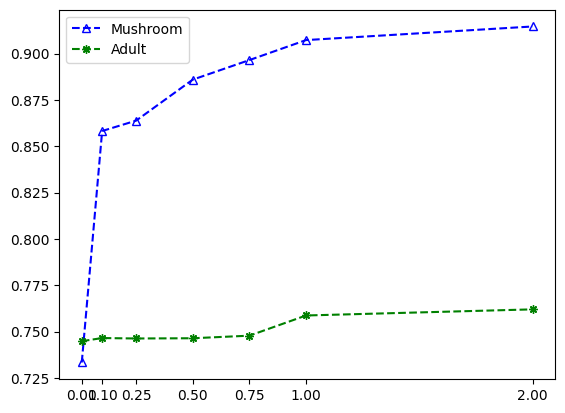

In [528]:
import matplotlib.pyplot as plt
import numpy as np

 #0.733380581148122,  0.8711552090715804, 0.8638554216867469,  0.8859673990077959, 0.8965272856130404, 0.9072997873848335, 0.9146389479486575

x = np.array( [0.01, 0.1, 0.25, 0.5, 0.75, 1, 2] )
y = np.array([0.733380581148122,  0.8582565556343019, 0.8638554216867469,  0.8859673990077959, 0.8965272856130404, 0.9072997873848335, 0.9146389479486575 ])
y2 = np.array([0.7448614242142951,  0.7465663894519484, 0.7463201166953984 , 0.7464527251027715,  0.7478451133801883, 0.7587322636255138, 0.7620342129691022 ])
                                                    #  0.7464527251027715                    # 0.7786765680944172

y3 = np.arrat([0.8833819241982507])
#  0.7448614242142951,  0.7465663894519484, 0.7463201166953984 , 0.7464527251027715,  0.7478451133801883, 0.7587322636255138, 0.7620342129691022

fig=plt.figure()
fig.show()

ax=fig.add_subplot(111)

ax.plot(x, y,c='b',marker="^",ls='--',label='Mushroom',fillstyle='none')

ax.plot(x, y2,c='g',marker=(8,2,0),ls='--',label='Adult')
ax.plot(x,y3, c='k',ls='-',label='Banknotes')
#ax.plot(x,(x-1)**2,c='r',marker="v",ls='-',label='GMC')
#ax.plot(x,x**2-1,c='m',marker="o",ls='--',label='BSwap',fillstyle='none')
#ax.plot(x,x-1,c='k',marker="+",ls=':',label='MSD')
ax.set_xticks(x)
plt.legend(loc=2)
plt.draw()


/tmp/ipykernel_516982/1212524942.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


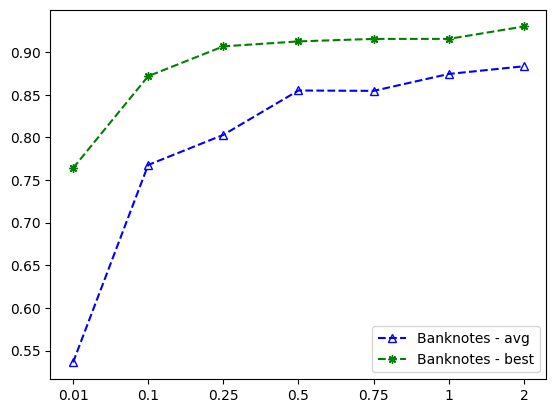

In [1072]:
# 2.0: 0.8833819241982507,  0.9300291545189504
# 1.0 : 0.8743440233236152,   0.9154518950437318 
# 0.75 : 0.8545189504373178,  0.915451895043731
# 0.5: 0.8549562682215743,  0.9125364431486881
# 0.25 : 0.8029154518950439, 0.9067055393586005
# 0.1 : 0.7676384839650146,  0.8717201166180758
# 0.01: 0.53600583090379, 0.7638483965014577

x = np.array( ["0.01", "0.1", "0.25", "0.5", "0.75", "1", "2"] )
y = np.array([ 0.53600583090379, 0.7676384839650146,  0.8029154518950439, 0.8549562682215743, 0.8545189504373178, 0.8743440233236152, 0.8833819241982507])
y2 = np.array([0.7638483965014577,  0.8717201166180758, 0.9067055393586005,  0.9125364431486881, 0.915451895043731, 0.9154518950437318, 0.9300291545189504])
                                                                     # 0.7786765680944172


#  0.7448614242142951,  0.7465663894519484, 0.7463201166953984 , 0.7464527251027715,  0.7478451133801883, 0.7587322636255138, 0.7620342129691022

fig=plt.figure()
fig.show()

ax=fig.add_subplot(111)

ax.plot(x, y,c='b',marker="^",ls='--',label='Banknotes - avg',fillstyle='none')

ax.plot(x, y2,c='g',marker=(8,2,0),ls='--',label='Banknotes - best')

#ax.plot(x,(x-1)**2,c='r',marker="v",ls='-',label='GMC')
#ax.plot(x,x**2-1,c='m',marker="o",ls='--',label='BSwap',fillstyle='none')
#ax.plot(x,x-1,c='k',marker="+",ls=':',label='MSD')
ax.set_xticks(x)
#ax.set_xticklabels(x)

plt.legend(loc=4)
plt.draw()

/tmp/ipykernel_516982/1911729291.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


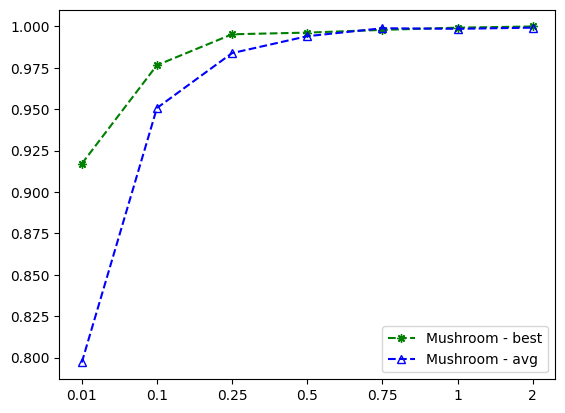

In [1121]:
# 0.01 : 0.7970942593905032, 0.9170800850460666
# 0.1 : 0.9507441530829197, 0.9766123316796598
# 0.25: 0.9839121190644932, 0.9992912827781715
# 0.5 : 0.9941176470588236, 0.9992912827781715
# 0.75 : 0.9989369241672573, 0.9979447200566973
# 1.0 : 0.9985825655563431, 0.9992912827781715
# 2.0 : 0.9992912827781715, 1.0



x = np.array( ["0.01", "0.1", "0.25", "0.5", "0.75", "1", "2"] )
y = np.array([ 0.7970942593905032, 0.9507441530829197, 0.9839121190644932, 0.9941176470588236, 0.9989369241672573, 0.9985825655563431, 0.9992912827781715 ])
y2 = np.array([0.9170800850460666, 0.9766123316796598, 0.9952912827781715, 0.9962912827781715, 0.9979447200566973, 0.9992912827781715, 1.0])
                                                                     # 0.7786765680944172


#  0.7448614242142951,  0.7465663894519484, 0.7463201166953984 , 0.7464527251027715,  0.7478451133801883, 0.7587322636255138, 0.7620342129691022

fig=plt.figure()
fig.show()

ax=fig.add_subplot(111)

ax.plot(x, y2,c='g',marker=(8,2,0),ls='--',label='Mushroom - best')

ax.plot(x, y,c='b',marker="^",ls='--',label='Mushroom - avg',fillstyle='none')


#ax.plot(x,(x-1)**2,c='r',marker="v",ls='-',label='GMC')
#ax.plot(x,x**2-1,c='m',marker="o",ls='--',label='BSwap',fillstyle='none')
#ax.plot(x,x-1,c='k',marker="+",ls=':',label='MSD')
ax.set_xticks(x)
#ax.set_xticklabels(x)

plt.legend(loc=4)
plt.draw()

/tmp/ipykernel_516982/1855523837.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


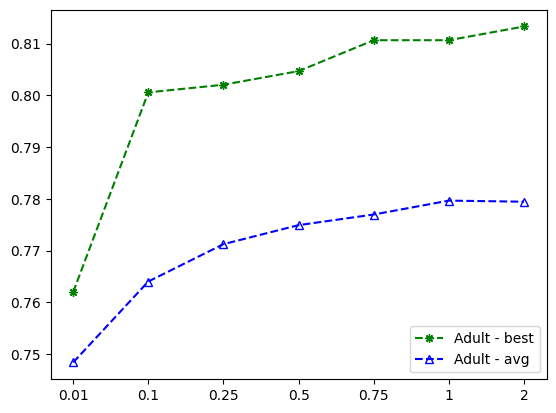

In [1191]:
# 0.01 : 0.748402068691155, 0.7619679087654158
# 0.1 :  0.7740352738363612, 0.8005569553109667
# 0.25 : 0.7712504972815276, 0.8220395173053971
# 0.5 : 0.7749237501657605, 0.8046678159395305
# 0.75 : 0.7869778543959687, 0.8106351942713168
# 1.0 : 0.7796578703089776, 0.8106351942713168
# 2.0 : 0.7764487468505503, 0.8132873624187773

x = np.array( ["0.01", "0.1", "0.25", "0.5", "0.75", "1", "2"] )
y = np.array([ 0.748402068691155, 0.7640352738363612, 0.7712504972815276, 0.7749237501657605, 0.7769778543959687,  0.7796578703089776, 0.7794487468505503])
y2 = np.array([0.7619679087654158, 0.8005569553109667, 0.8020395173053971, 0.8046678159395305, 0.8106351942713168, 0.8106351942713168, 0.8132873624187773])
                                                                     # 0.7786765680944172


#  0.7448614242142951,  0.7465663894519484, 0.7463201166953984 , 0.7464527251027715,  0.7478451133801883, 0.7587322636255138, 0.7620342129691022

fig=plt.figure()
fig.show()

ax=fig.add_subplot(111)

ax.plot(x, y2,c='g',marker=(8,2,0),ls='--',label='Adult - best')

ax.plot(x, y,c='b',marker="^",ls='--',label='Adult - avg',fillstyle='none')


#ax.plot(x,(x-1)**2,c='r',marker="v",ls='-',label='GMC')
#ax.plot(x,x**2-1,c='m',marker="o",ls='--',label='BSwap',fillstyle='none')
#ax.plot(x,x-1,c='k',marker="+",ls=':',label='MSD')
ax.set_xticks(x)
#ax.set_xticklabels(x)

plt.legend(loc=4)
plt.draw()